# Modelos de Predicción en Inmuebles

## Variables

- ad_description: Descripción del anuncio
- ad_last_update: Ultima actualización del anuncio
- air_conditioner: Aire acondicionado
- balcony: Balcon
- bath_num: Número de baños
- built_in_wardrobe: Armario empotrado
- chimney: Chimenea
- condition: Condición (Segunda mano, Nueva contrucción)
- construct_date: Fecha construcción
- energetic_certif: Si posee certificado energetico
- floor: Piso
- garage: Garaje
- garden: Jardin
- ground_size: 
- heating: tipo de calefacción
- house_id: id casa
- house_type: Tipo de casa
- kitchen: SI posee cocina
- lift: Ascensor
- loc_city: Ciudad
- loc_district: Distrito
- loc_full: Localización completa
- loc_neigh: Barrio
- loc_street: Calle
- loc_zone: Zona
- m2_real: m2 reales
- m2_useful: m2 utilizables
- obtention_date: Obtención de los datos
- orientation: Orientación de la casa
- price: Precio
- reduced_mobility: Adaptado a movilidad reducida
- room_num: Numero de habitaciones
- storage_room: Trastero
- swimming_pool: Piscina
- terrace: Terraza
- unfurnished: Sin muebles
- number_of_companies_prov
- population_prov
- companies_prov_vs_national_%
- population_prov_vs_national_%
- renta_media_prov

In [1]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split, cross_val_score

### Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor, plot_importance

# Módulos sklearn para selección de modelo de ML
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

### Métricas
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

### Interpretabilidad
import shap
import lime
import lime.lime_tabular

In [2]:
df = pd.read_csv('./data/spanish_houses.csv')
df.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,room_num,storage_room,swimming_pool,terrace,unfurnished,number_of_companies_prov,population_prov,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,segunda mano/buen estado,NaN,NaN,...,4,0,0,1,NaN,19147,328868,0.57,0.7,19889.0
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,2006.0,no indicado,...,3,1,0,0,NaN,19147,328868,0.57,0.7,19889.0
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,segunda mano/buen estado,NaN,no indicado,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,segunda mano/buen estado,NaN,en trámite,...,4,1,0,1,NaN,19147,328868,0.57,0.7,19889.0
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,2,1,1,1,NaN,19147,328868,0.57,0.7,19889.0


In [3]:
# Estadísticas descriptivas
df.describe()

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,construct_date,garden,ground_size,house_id,kitchen,...,room_num,storage_room,swimming_pool,terrace,unfurnished,number_of_companies_prov,population_prov,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov
count,99713.000000,99713.000000,99713.000000,99713.000000,99713.000000,31833.000000,99713.000000,0.0,9.971300e+04,2029.0,...,99713.000000,99713.000000,99713.000000,99713.000000,463.0,99713.000000,9.971300e+04,99713.000000,99713.000000,59186.000000
mean,0.229378,0.181621,1.973695,0.424288,0.036886,1982.132347,0.278479,NaN,6.425736e+07,1.0,...,3.204587,0.411250,0.183888,0.479215,1.0,100076.945153,1.321123e+06,3.001349,2.828251,11871.860261
std,0.420435,0.385534,1.227910,0.494237,0.188482,96.091986,0.448253,NaN,2.534508e+07,0.0,...,1.553627,0.492063,0.387395,0.499570,0.0,114524.752857,1.380352e+06,3.431685,2.954830,9978.392449
min,0.000000,0.000000,0.000000,0.000000,0.000000,1700.000000,0.000000,NaN,1.539950e+05,1.0,...,0.000000,0.000000,0.000000,0.000000,1.0,5689.000000,8.860000e+04,0.170000,0.190000,21.613000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1970.000000,0.000000,NaN,3.834262e+07,1.0,...,2.000000,0.000000,0.000000,0.000000,1.0,49582.000000,7.205920e+05,1.490000,1.540000,22.822000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,1990.000000,0.000000,NaN,8.237862e+07,1.0,...,3.000000,0.000000,0.000000,0.000000,1.0,75628.000000,1.128908e+06,2.270000,2.420000,19818.000000
75%,0.000000,0.000000,2.000000,1.000000,0.000000,2005.000000,1.000000,NaN,8.416156e+07,1.0,...,4.000000,1.000000,0.000000,1.000000,1.0,96638.000000,1.149628e+06,2.900000,2.460000,19818.000000
max,1.000000,1.000000,84.000000,1.000000,1.000000,9999.000000,1.000000,NaN,8.507379e+07,1.0,...,84.000000,1.000000,1.000000,1.000000,1.0,538917.000000,6.578079e+06,16.150000,14.080000,21714.000000


In [4]:
# Tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99713 entries, 0 to 99712
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ad_description                 95139 non-null  object 
 1   ad_last_update                 99713 non-null  object 
 2   air_conditioner                99713 non-null  int64  
 3   balcony                        99713 non-null  int64  
 4   bath_num                       99713 non-null  int64  
 5   built_in_wardrobe              99713 non-null  int64  
 6   chimney                        99713 non-null  int64  
 7   condition                      85781 non-null  object 
 8   construct_date                 31833 non-null  float64
 9   energetic_certif               74425 non-null  object 
 10  floor                          79443 non-null  object 
 11  garage                         40579 non-null  object 
 12  garden                         99713 non-null 

In [5]:
df.isin( [ 0 ] ).sum()

ad_description                       0
ad_last_update                       0
air_conditioner                  76841
balcony                          81603
bath_num                           670
built_in_wardrobe                57406
chimney                          96035
condition                            0
construct_date                       0
energetic_certif                     0
floor                                0
garage                               0
garden                           71945
ground_size                          0
heating                              0
house_id                             0
house_type                           0
kitchen                              0
lift                             20223
loc_city                             0
loc_district                         0
loc_full                             0
loc_neigh                            0
loc_street                           0
loc_zone                             0
m2_real                  

## Preprocesamiento

In [6]:
# Haremos por seguridad una copia del marco de datos original antes de su procesamiento posterior 
inmuebles = df.copy()

Eliminaremos las siguientes columnas: <br>
- "ad_description" ya que tendriamos que aplicar la libreria nltk y no tiene sentido ya que son anuncios sin ninguna valoración ni sentimiento
- "ad_last_update" porque no nos aporta valor a los datos
- "ground_size" ya que no tiene ningun valor
- "house_id" porque esto no influye en los precios de los inmuebles
- "loc_city" ya que con la columna "loc_full" tenemos suficiente información.
- "loc_district" ya que con la columna "loc_full" tenemos suficiente información.
- "loc_neigh" ya que con la columna "loc_full" tenemos suficiente información.
- "loc_street" ya que con la columna "loc_full" tenemos suficiente información
- "loc_zone" ya que con la columna "loc_full" tenemos suficiente información.
- "m2_useful" porque no varia mucho de los metros reales
- "obtention_date" porque esto no influye en los precios de los inmuebles
- "number_of_companies_prov" porque esto no influye en los precios de los inmuebles
- "population_prov" porque esto no influye en los precios de los inmuebles
- "companies_prov_vs_national_%" porque esto no influye en los precios de los inmuebles
- "population_prov_vs_national_%" porque esto no influye en los precios de los inmuebles
- "renta_media_prov" porque esto no influye en los precios de los inmuebles

In [7]:
features_list = list(inmuebles.columns)
features_list.remove('ad_description')
features_list.remove('ad_last_update')
features_list.remove('ground_size')
features_list.remove('house_id')
features_list.remove('loc_city')
features_list.remove('loc_district')
features_list.remove('loc_neigh')
features_list.remove('loc_street')
features_list.remove('loc_zone')
features_list.remove('m2_useful')
features_list.remove('obtention_date')
features_list.remove('number_of_companies_prov')
features_list.remove('population_prov')
features_list.remove('companies_prov_vs_national_%')
features_list.remove('population_prov_vs_national_%')
features_list.remove('renta_media_prov')

print(features_list)

['air_conditioner', 'balcony', 'bath_num', 'built_in_wardrobe', 'chimney', 'condition', 'construct_date', 'energetic_certif', 'floor', 'garage', 'garden', 'heating', 'house_type', 'kitchen', 'lift', 'loc_full', 'm2_real', 'orientation', 'price', 'reduced_mobility', 'room_num', 'storage_room', 'swimming_pool', 'terrace', 'unfurnished']


### Valores nulos

Primero trataremos los valores nulos.

De las siguientes columnas intercambiandolos por la media:
- 'construct_date'

De las siguientes columnas intercambiandolos por el mismo valor que hay en la columna 'm2_real':
- 'm2_useful'

De las siguientes columnas intercambiandolos por 0:
- 'lift' ya que son valores 0(no tiene) o 1(tiene) 
- 'unfurnished' el 0 sera que esta amueblado y 1 no esta amueblado
- 'kitchen' 0 tiene cocina y 1 no tiene cocina

De las siguientes columnas pondremos el valor más repetido:
- 'condition'
- 'energetic_certif'

De las siguientes columnas los convertiremos en categoricos:
- 'floor' la mayoria de datos que son nulos son casas independientes o chalets.
- 'garage' los nulos los trataremos como que no poseen garage.
- 'heating' los nulos los trataremos que no poseen calefacción
- 'orientation' 

In [8]:
# Reemplaza los valores nulos por la media aritmética
inmuebles['construct_date'].fillna(inmuebles['construct_date'].mean(), inplace=True)

# Reemplaza los valores nulos por 0
inmuebles['lift'].fillna(0, inplace=True)
inmuebles['unfurnished'].fillna(0, inplace=True)
inmuebles['kitchen'].fillna(0, inplace=True)

# Reemplaza los valores nulos en la columna por la moda(valor más repetido)
inmuebles['condition'].fillna(inmuebles['condition'].mode()[0], inplace=True)
inmuebles['energetic_certif'].fillna(inmuebles['energetic_certif'].mode()[0], inplace=True)

### Tipo de dato

Necesitamos modificar los tipos de datos. <br><br>
Las columnas a modificar como integer seran las siguientes:
- construct_date
- kitchen
- lift
- unfurnished

Las columnas a modificar como categorico seran las siguientes:
- condition
- energetic_certif
- floor
- garage
- heating
- house_type
- loc_full
- orientation

#### Integers

In [9]:
inmuebles['construct_date'] = inmuebles['construct_date'].astype('int64')
inmuebles['kitchen'] = inmuebles['kitchen'].astype('int64')
inmuebles['lift'] = inmuebles['lift'].astype('int64')
inmuebles['unfurnished'] = inmuebles['unfurnished'].astype('int64')

#### Categoricos

In [10]:
inmuebles['condition'] = inmuebles['condition'].astype('category').cat.codes
inmuebles['energetic_certif'] = inmuebles['energetic_certif'].astype('category').cat.codes
inmuebles['floor'] = inmuebles['floor'].astype('category').cat.codes
inmuebles['garage'] = inmuebles['garage'].astype('category').cat.codes
inmuebles['heating'] = inmuebles['heating'].astype('category').cat.codes
inmuebles['house_type'] = inmuebles['house_type'].astype('category').cat.codes
inmuebles['loc_full'] = inmuebles['loc_full'].astype('category').cat.codes
inmuebles['orientation'] = inmuebles['orientation'].astype('category').cat.codes

Asi es como finalmente se quedaria el dataset

In [11]:
inmuebles[features_list].head()

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,floor,garage,...,loc_full,m2_real,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
0,0,0,2,0,0,1,1982,0,5,0,...,36400,1000,8,310000,0,4,0,0,1,0
1,0,0,2,0,0,1,2006,2,56,-1,...,47557,86,-1,139000,1,3,1,0,0,0
2,0,0,3,0,0,1,1982,2,7,0,...,11893,3000,-1,480000,0,4,1,0,1,0
3,0,1,1,1,1,1,1982,0,7,-1,...,6559,86,-1,150000,0,4,1,0,1,0
4,0,0,1,0,0,1,1982,2,49,0,...,17128,76,14,90000,0,2,1,1,1,0


In [12]:
# Tipos de datos
inmuebles[features_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99713 entries, 0 to 99712
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   air_conditioner    99713 non-null  int64
 1   balcony            99713 non-null  int64
 2   bath_num           99713 non-null  int64
 3   built_in_wardrobe  99713 non-null  int64
 4   chimney            99713 non-null  int64
 5   condition          99713 non-null  int8 
 6   construct_date     99713 non-null  int64
 7   energetic_certif   99713 non-null  int8 
 8   floor              99713 non-null  int8 
 9   garage             99713 non-null  int16
 10  garden             99713 non-null  int64
 11  heating            99713 non-null  int8 
 12  house_type         99713 non-null  int8 
 13  kitchen            99713 non-null  int64
 14  lift               99713 non-null  int64
 15  loc_full           99713 non-null  int32
 16  m2_real            99713 non-null  int64
 17  orientation 

In [13]:
inmuebles[features_list].isin( [ 0 ] ).sum()

air_conditioner      76841
balcony              81603
bath_num               670
built_in_wardrobe    57406
chimney              96035
condition             2559
construct_date           0
energetic_certif     72177
floor                 3963
garage               39304
garden               71945
heating               2500
house_type            3001
kitchen              97684
lift                 61193
loc_full                 4
m2_real                  0
orientation           5432
price                    0
reduced_mobility     91658
room_num              1254
storage_room         58706
swimming_pool        81377
terrace              51929
unfurnished          99250
dtype: int64

## Analisis de datos

### Analisis univariante

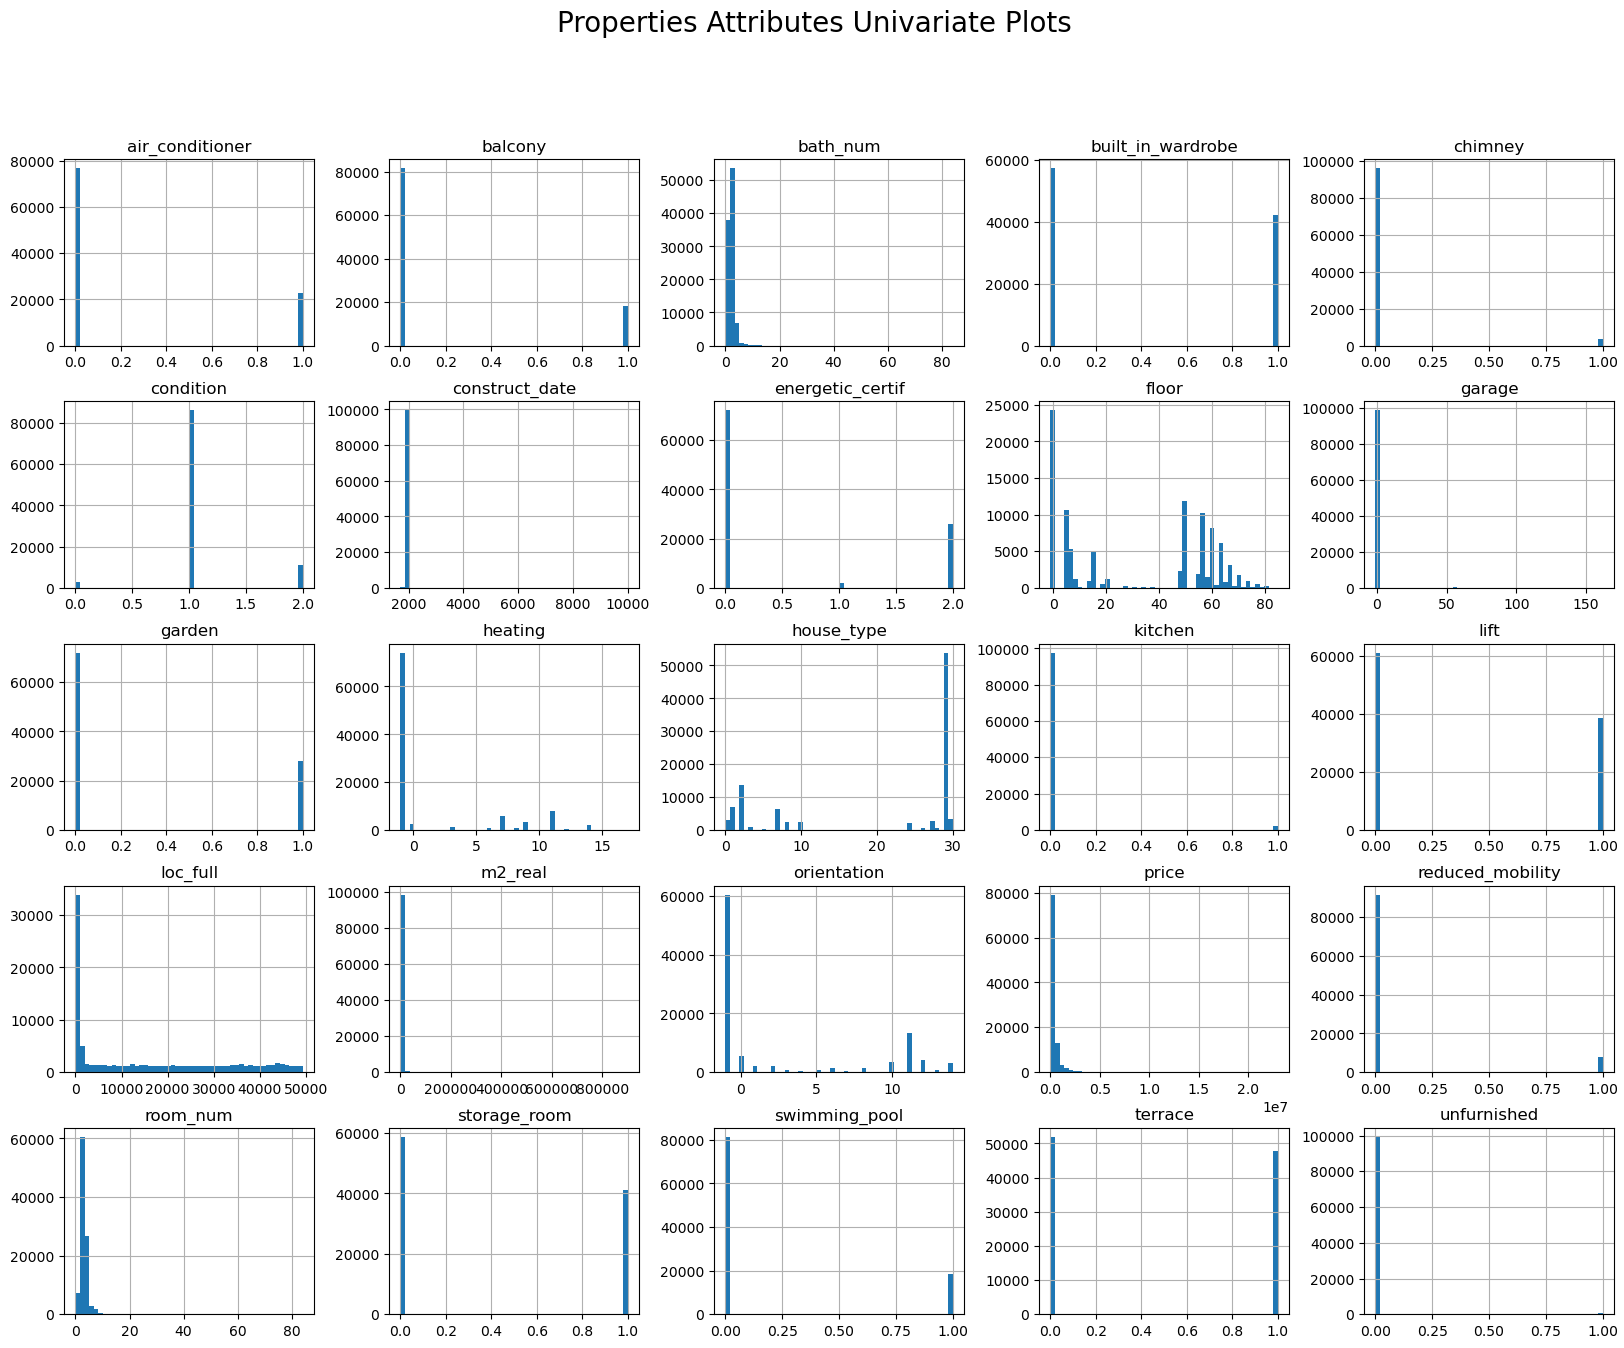

In [14]:
inmuebles[features_list].hist(bins=50, figsize=(20,15))
plt.suptitle('Properties Attributes Univariate Plots', fontsize=20);
plt.show()

### Correlaciones

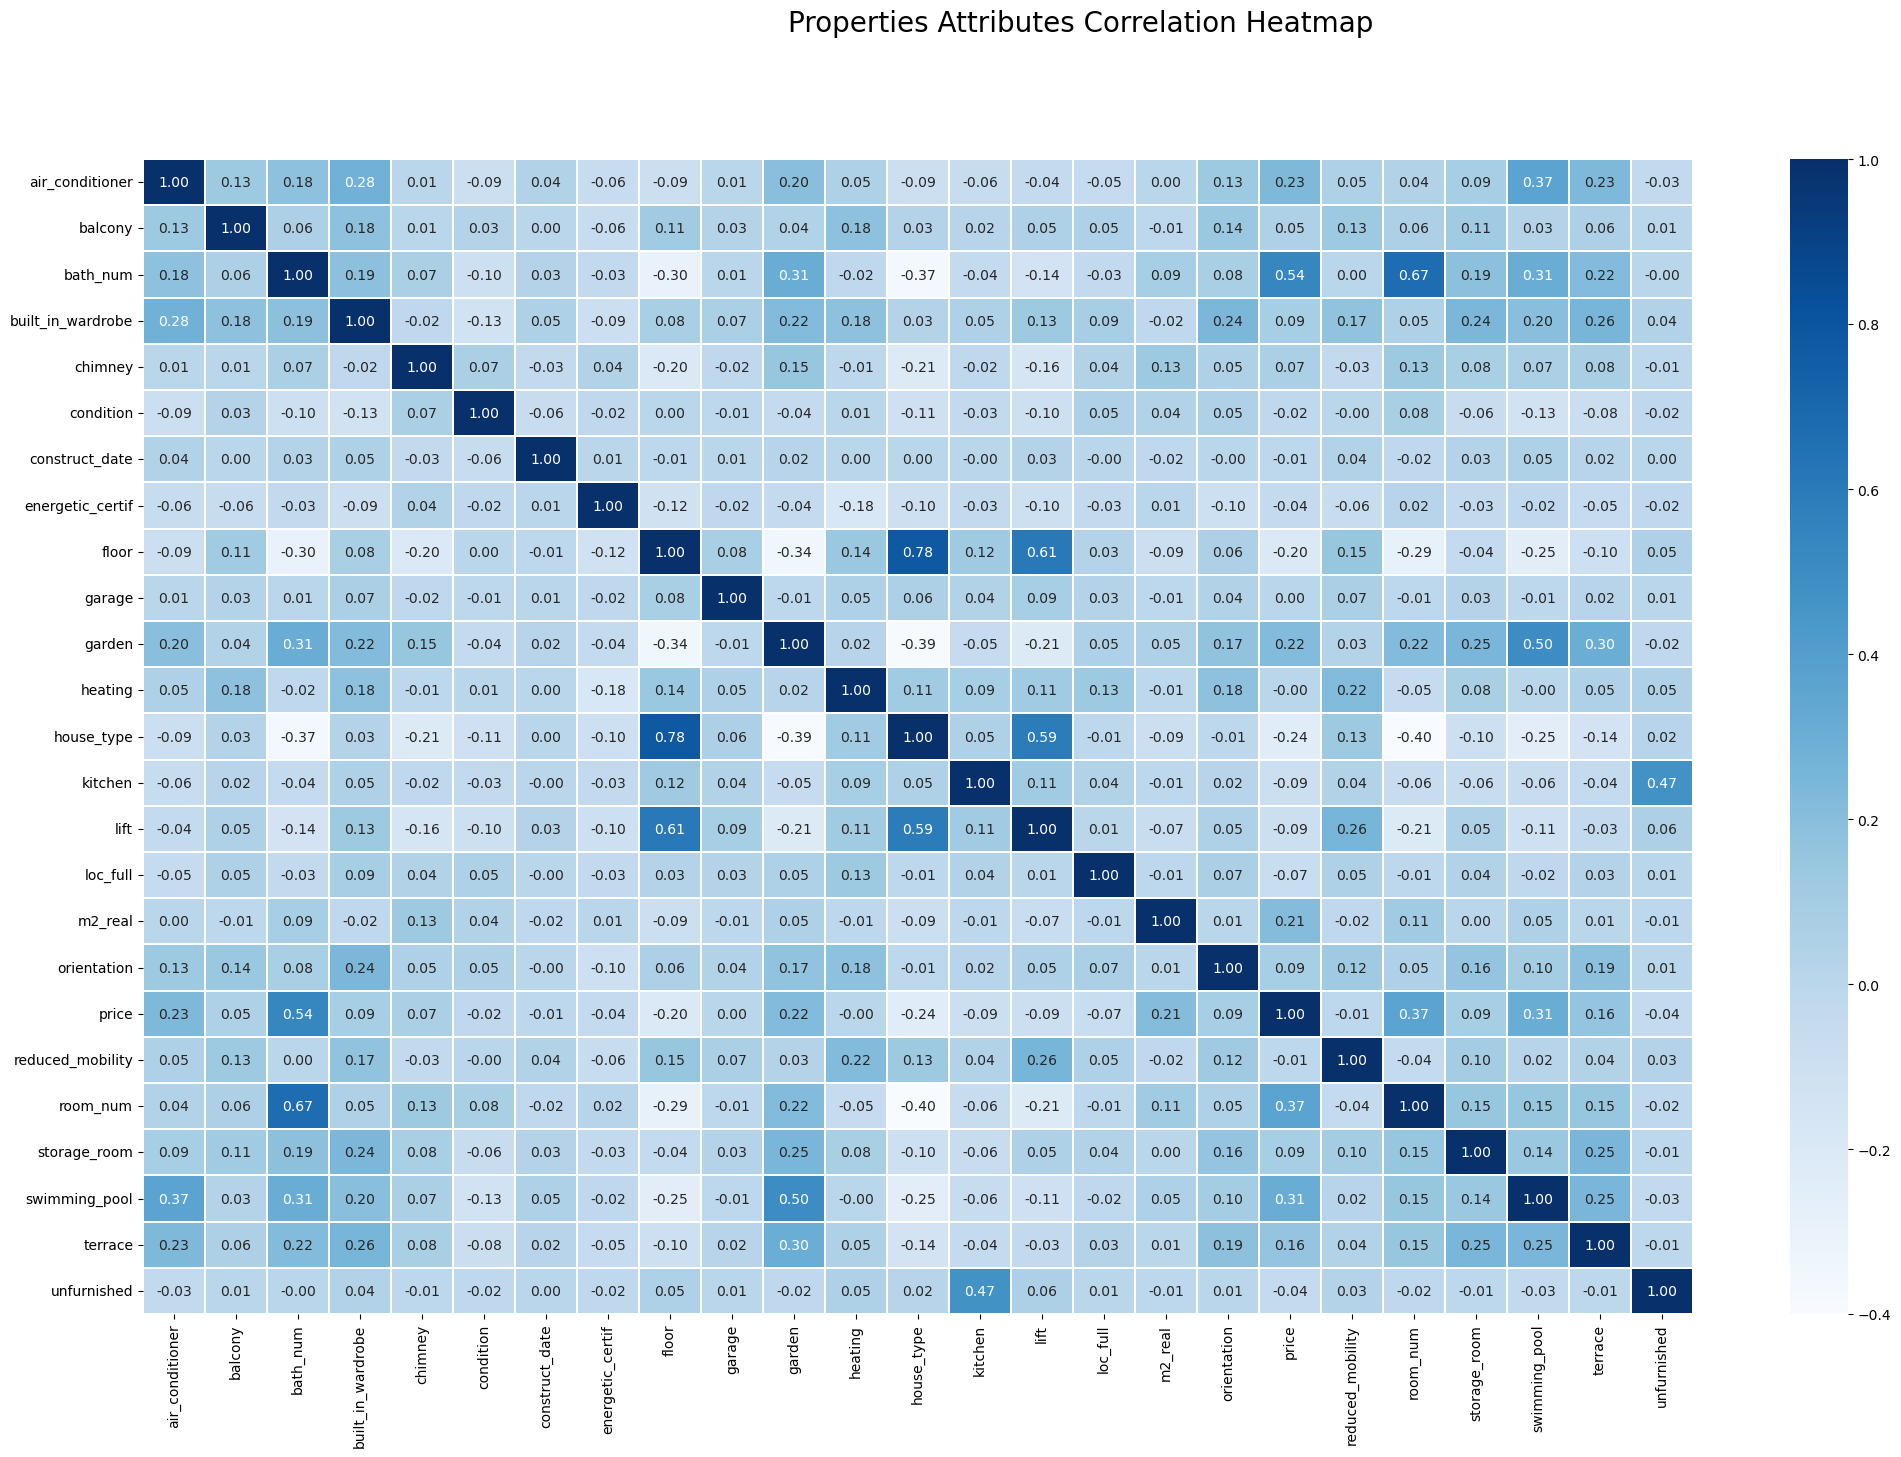

In [15]:
# Visualizamos las correlaciones
plt.subplots(figsize=(25, 15))
corr = inmuebles[features_list].corr()
hm = sns.heatmap(round(corr,2), annot=True, cmap="Blues",fmt='.2f',
            linewidths=.05)

plt.suptitle('Properties Attributes Correlation Heatmap', fontsize=20);

Segun el mapa de correlación podemos observar que los atributos más relacionados con el precio son:
- Aire acondicionado
- Numero de baños
- Jardin
- Metros cuadros reales
- Numero de habitaciones
- Piscina

Por el contrario los menos relacionados son el piso es decir la altura y el tipo de casa si es un piso, un chalet, etc.

Además de que cocina no aporta ningun tipo de correlación con ningun atributo.

Para mayor informacíon realizaremos una tabla donde podremos observar mejor como evolucionan los valores de los atributos más insteresantes anteriormente nombrados.

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='m2_real', ylabel='price'>,
        <Axes: xlabel='room_num', ylabel='price'>,
        <Axes: xlabel='bath_num', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='m2_real'>,
        <Axes: xlabel='m2_real', ylabel='m2_real'>,
        <Axes: xlabel='room_num', ylabel='m2_real'>,
        <Axes: xlabel='bath_num', ylabel='m2_real'>],
       [<Axes: xlabel='price', ylabel='room_num'>,
        <Axes: xlabel='m2_real', ylabel='room_num'>,
        <Axes: xlabel='room_num', ylabel='room_num'>,
        <Axes: xlabel='bath_num', ylabel='room_num'>],
       [<Axes: xlabel='price', ylabel='bath_num'>,
        <Axes: xlabel='m2_real', ylabel='bath_num'>,
        <Axes: xlabel='room_num', ylabel='bath_num'>,
        <Axes: xlabel='bath_num', ylabel='bath_num'>]], dtype=object)

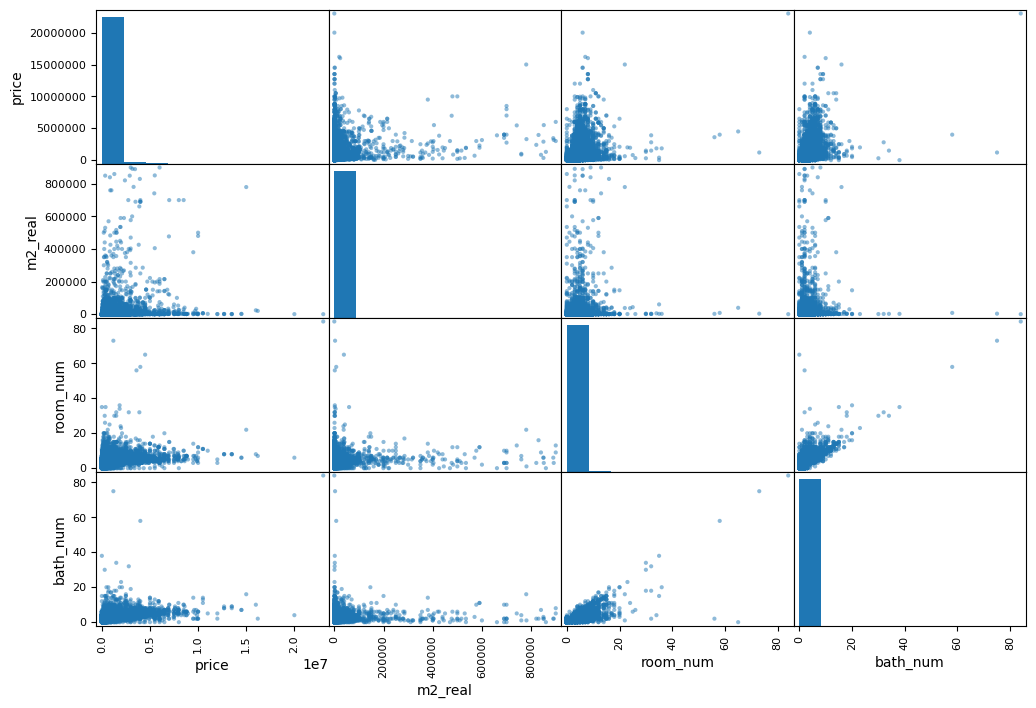

In [16]:
attributes = ["price", "m2_real", "room_num", "bath_num"]
scatter_matrix(inmuebles[attributes], figsize=(12, 8))

Dato importante al observar la tabla que se puede extraer es que al aumentar los metros cuadrados (m2_real) no aumenta el precio en la misma proporción.

## Modelos Predictivos

In [17]:
# Crear el objetivo y la columna de características y dividir el conjunto de datos en conjunto de prueba y de entrenamiento.

X = inmuebles[features_list].drop('price', axis=1)
y = inmuebles['price']

# 75% para entrenamiento, 25% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((79770, 24), (19943, 24))

In [18]:
# selección de algoritmos a tener en cuenta y establecimiento de medidas de rendimiento
models = []
models.append(('Linear Regression', LinearRegression(n_jobs=-1)))
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('KNeighbors Regressor', KNeighborsRegressor()))
models.append(('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)))
models.append(('Random Forest', RandomForestRegressor(random_state=42, n_jobs=-1)))
models.append(('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)))
models.append(('XGBoost Regressor', XGBRegressor(random_state=42, n_jobs=-1)))
models.append(('Support Vector Regressor', SVR()))

In [19]:
# Entrenar y evaluar modelos
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, mse))

# Ordenar modelos por su precisión (R^2)
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

# Mostrar resultados ordenados
for name, r2, mse in results_sorted:
    print(f'{name}:')
    print(f'R^2: {r2}')
    print(f'MSE: {mse}\n')

XGBoost Regressor:
R^2: 0.5712785089691159
MSE: 179527280273.72662

Random Forest:
R^2: 0.5703950108300855
MSE: 179897245440.7297

Gradient Boosting Regressor:
R^2: 0.49900387103234933
MSE: 209792311192.41534

Linear Regression:
R^2: 0.3144600103888997
MSE: 287070119946.2235

Ridge Regression:
R^2: 0.3144598815585977
MSE: 287070173893.9593

Lasso Regression:
R^2: 0.3144597584389074
MSE: 287070225450.3744

Decision Tree Regressor:
R^2: 0.280257789233075
MSE: 301392312492.8607

KNeighbors Regressor:
R^2: 0.2790839411771818
MSE: 301883861793.13574

Support Vector Regressor:
R^2: -0.07297894127718108
MSE: 449310321848.5458



Mejoraremos los siguientes modelos predictivos:
- XGBoost
- RandomForest

Para ello investigaremos los hiperparametros que mejor se adaptan a nuestros datos y ralizaremos una validacion cruzada para mayor seguridad de la prediccion.

### Mejora de modelos

#### Hiperparametros RandomForest

In [20]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', "log2"],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instanciar el modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print(f'Mejores hiperparámetros: {grid_search.best_params_}')

# Evaluación con el conjunto de prueba
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mejorado Random Forest R^2: {r2}')
print(f'Mejorado Random Forest MSE: {mse}')

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejorado Random Forest R^2: 0.5837070706582477
Mejorado Random Forest MSE: 174322815546.75702


#### Hiperparametros XGBoost

In [21]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 2, 3],
}

# Instanciar el modelo XGBoost
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Instanciar GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print(f'Mejores hiperparámetros: {grid_search.best_params_}')

# Evaluación con el conjunto de prueba
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mejorado XGBoost R^2: {r2}')
print(f'Mejorado XGBoost MSE: {mse}')

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
Mejores hiperparámetros: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 3, 'subsample': 0.9}
Mejorado XGBoost R^2: 0.605086966103158
Mejorado XGBoost MSE: 165369976554.40314


#### Seleccion caracteristicas

Seleccionaremos previamente que caracteristicas son mejores en nuestro dataframe para asi no tener caracteristicas innecesarias a la hora de entrenar los modelos.

In [29]:
xgb = XGBRegressor(colsample_bytree= 0.7, gamma= 0, learning_rate= 0.1, max_depth= 7,
                   n_estimators= 500, reg_alpha= 1, reg_lambda= 3, subsample= 0.9, 
                   objective='reg:squarederror', random_state= 42, n_jobs=-1)

xgb.fit(X_train, y_train)

selection = SelectFromModel(xgb, threshold='median', prefit=True)
selected_features = X_train.columns[(selection.get_support())]

# Transformar los conjuntos de datos para contener solo las características seleccionadas.
X_train_selected = selection.transform(X_train)
X_test_selected = selection.transform(X_test)

print(f'Caracteristicas seleccionadas: {selected_features}')

Caracteristicas seleccionadas: Index(['air_conditioner', 'bath_num', 'construct_date', 'energetic_certif',
       'heating', 'house_type', 'kitchen', 'lift', 'loc_full', 'm2_real',
       'room_num', 'swimming_pool'],
      dtype='object')


X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


### Validación Cruzada

In [23]:
# Crear las matrices de características y objetivo.
X = inmuebles[features_list].drop('price', axis=1)
y = inmuebles['price']

##### RandomForest

In [30]:
rf = RandomForestRegressor(bootstrap= False, max_depth= None, max_features= 'sqrt',
                            min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200, 
                            random_state= 42, n_jobs= -1)

# Definir el scoring basado en MSE y R^2 para la validación cruzada
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Realizar validación cruzada para MSE
mse_scores = cross_val_score(rf, X, y, cv=5, scoring=mse_scorer)

# Realizar validación cruzada para R^2
r2_scores = cross_val_score(rf, X, y, cv=5, scoring=r2_scorer)

# Calcular el rendimiento promedio y la desviación estándar
print("Validación Cruzada - RandomForest")
print(f"MSE promedio: {-np.mean(mse_scores)}, Desviación estándar: {np.std(mse_scores)}")
print(f"R^2 promedio: {np.mean(r2_scores)}, Desviación estándar: {np.std(r2_scores)}")

Validación Cruzada - RandomForest
MSE promedio: 204684432335.8482, Desviación estándar: 170814904559.3946
R^2 promedio: 0.4024609044152996, Desviación estándar: 0.15271886171954752


##### XGBoost

In [31]:
xgb = XGBRegressor(colsample_bytree= 0.7, gamma= 0, learning_rate= 0.1, max_depth= 7,
                   n_estimators= 500, reg_alpha= 1, reg_lambda= 3, subsample= 0.9, 
                   objective='reg:squarederror', random_state= 42, n_jobs=-1)

# Definir el scoring basado en MSE y R^2 para la validación cruzada
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Realizar validación cruzada para MSE
mse_scores = cross_val_score(xgb, X, y, cv=5, scoring=mse_scorer)

# Realizar validación cruzada para R^2
r2_scores = cross_val_score(xgb, X, y, cv=5, scoring=r2_scorer)

# Calcular el rendimiento promedio y la desviación estándar
print("Validación Cruzada - XGBoost")
print(f"MSE promedio: {-np.mean(mse_scores)}, Desviación estándar: {np.std(mse_scores)}")
print(f"R^2 promedio: {np.mean(r2_scores)}, Desviación estándar: {np.std(r2_scores)}")

Validación Cruzada - XGBoost
MSE promedio: 217024518092.71832, Desviación estándar: 183141599286.9259
R^2 promedio: 0.3661959670504106, Desviación estándar: 0.14901127456751365


### Modelos termiandos

#### RandomForest

In [18]:
rf = RandomForestRegressor(bootstrap= False, max_depth= None, max_features= 'sqrt',
                            min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200, 
                            random_state= 42, n_jobs= -1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'RandomForest R^2: {r2}')
print(f'RandomForest MSE: {mse}')

RandomForest R^2: 0.5837070706582477
RandomForest MSE: 174322815546.75702


#### XGBoost

In [19]:
xgb = XGBRegressor(colsample_bytree= 0.7, gamma= 0, learning_rate= 0.1, max_depth= 7,
                   n_estimators= 500, reg_alpha= 1, reg_lambda= 3, subsample= 0.9, 
                   objective='reg:squarederror', random_state= 42, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost R^2: {r2}')
print(f'XGBoost MSE: {mse}')

XGBoost R^2: 0.605086966103158
XGBoost MSE: 165369976554.40314


### Interpretabilidad

Utilizaremos el modelo XGBoost para realizar la interpretabilidad debido a que nos ha dado unos buenos resutados en la validación cruzada y la aplicación de estos metodo es mejor para un modelo como este.

#### Propio modelo

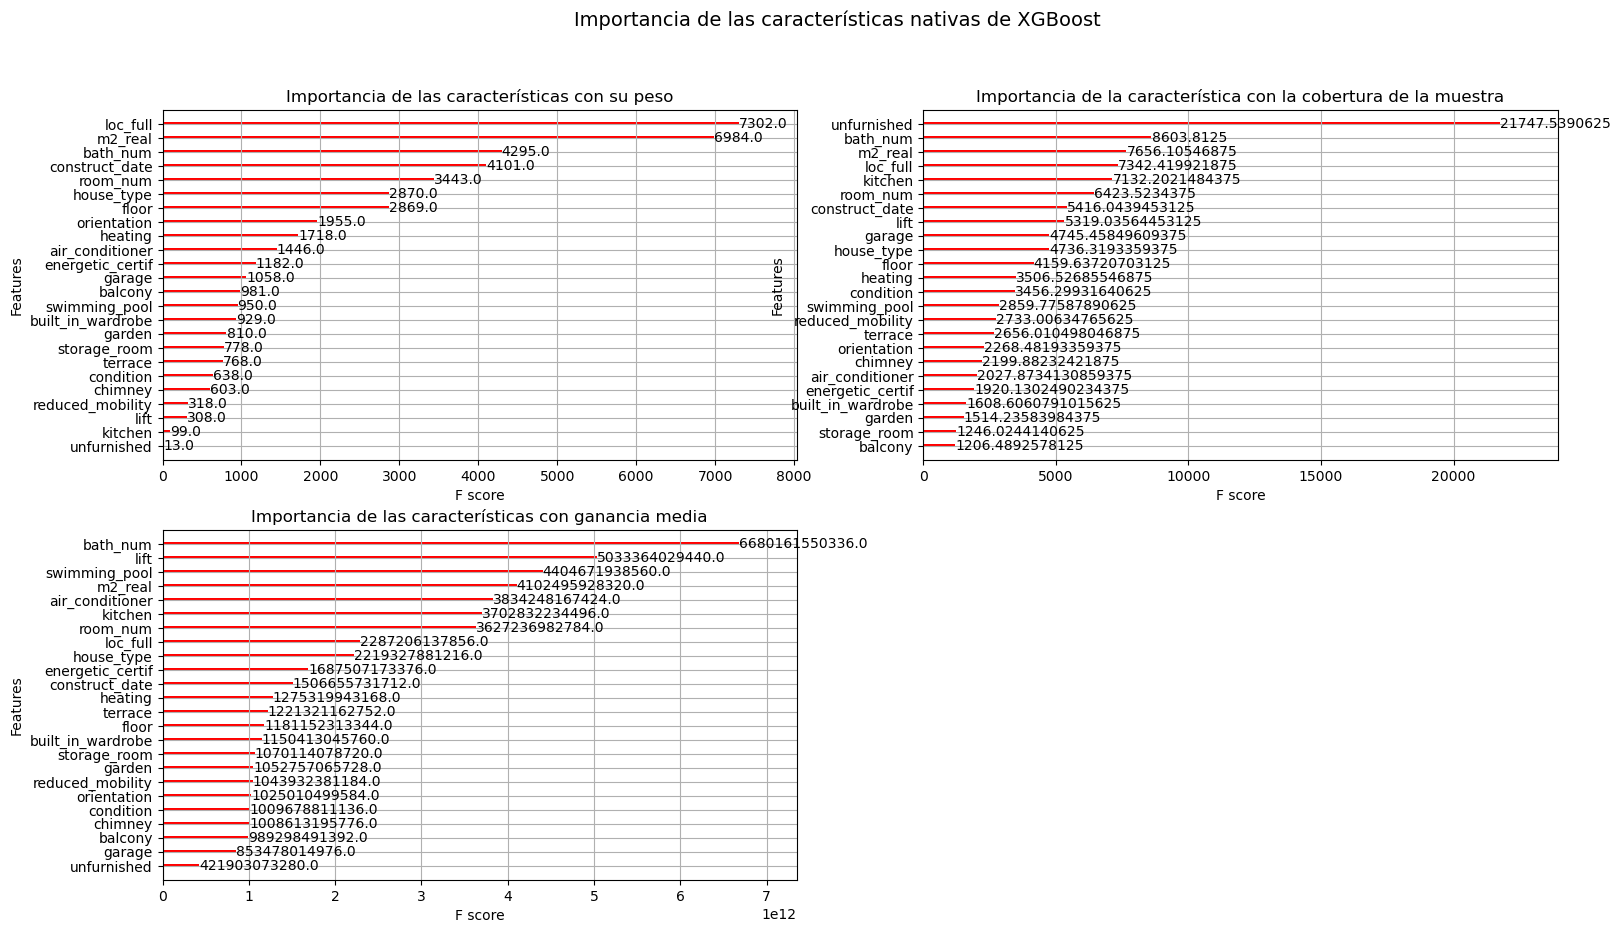

In [20]:
# Trazando la importancia de las características de XGBoost
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Importancia de las características nativas de XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Importancia de las características con su peso");

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Importancia de la característica con la cobertura de la muestra");

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Importancia de las características con ganancia media");

#### SHAP

[22:58:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


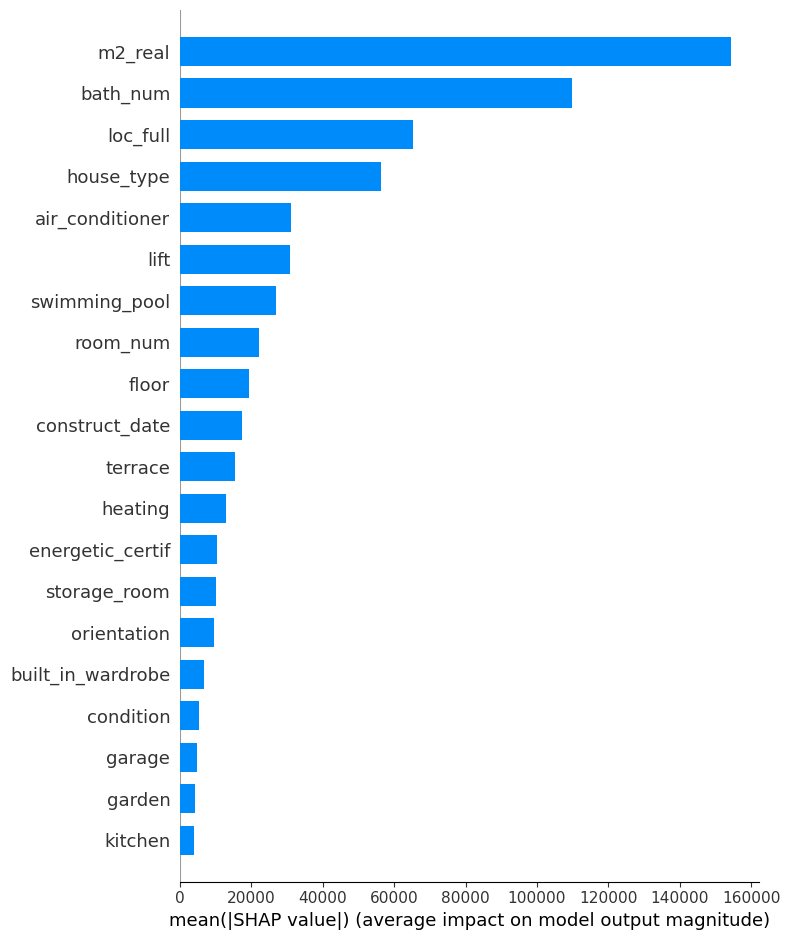

In [21]:
# Inicializar el explainer de SHAP
explainer = shap.TreeExplainer(xgb)

# Calcular los valores SHAP para las observaciones de entrenamiento
shap_values = explainer.shap_values(X_train)

# Visualización de la importancia de las características
shap.summary_plot(shap_values, X_train, plot_type="bar")

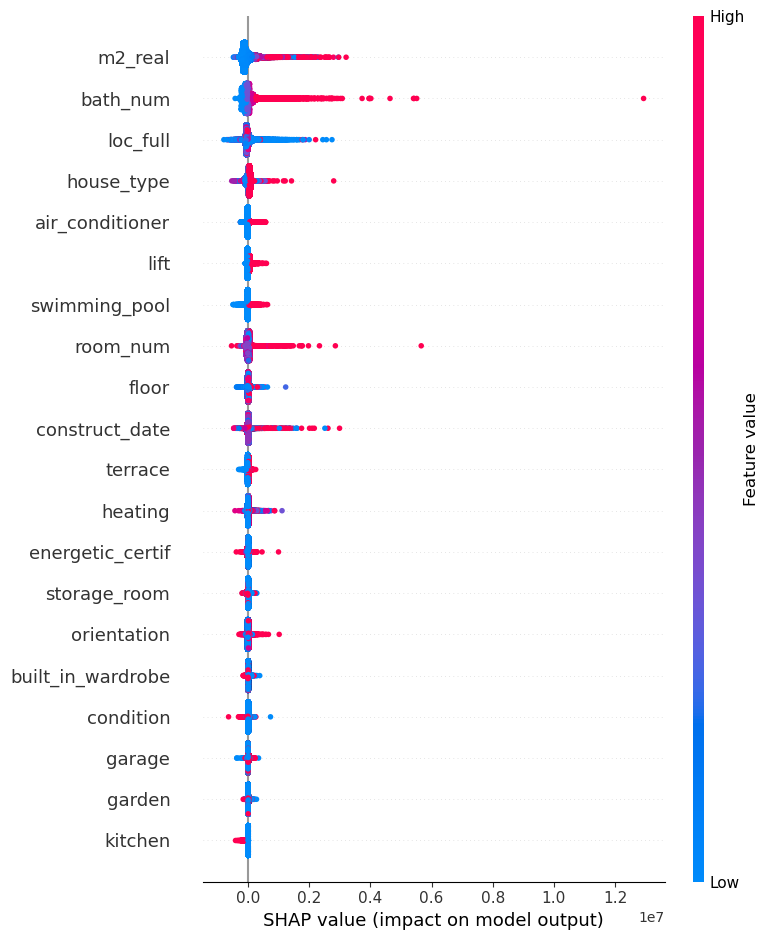

In [22]:
shap.summary_plot(shap_values, X_train)

#### LIME

In [20]:
# Asegúrate de que X_train y X_test sean numpy arrays
X_train_np = X_train.values if not isinstance(X_train, np.ndarray) else X_train
X_test_np = X_test.values if not isinstance(X_test, np.ndarray) else X_test

# Crear el explicador LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_test_np, 
    feature_names=X_test.columns, 
    class_names=['target'],
    mode='regression'
)

In [21]:
# Definir una función de predicción que devuelva una lista en lugar de un array numpy
def predict_fn(data):
    return xgb.predict(data).astype(float)

In [23]:
# Seleccionar una instancia específica para explicar (por ejemplo, la primera instancia de X_test)
instance_index = 102
instance_to_explain = X_test_np[instance_index].reshape(1, -1)

print('Reference:', instance_index)
print('Predicted:', xgb.predict(instance_to_explain)[0])

# Generar la explicación LIME para la instancia seleccionada
explainer.explain_instance(instance_to_explain[0], predict_fn).show_in_notebook()

Reference: 102
Predicted: 137312.19


In [129]:
inmuebles[features_list].iloc[instance_index]['m2_real']

100

Gracias a la interpretabilidad podemos observar que pesos tiene cada columna de nuestro dataframe en la decisión del precio del inmueble. Observando que las columnas que más peso obtienen son: m2_useful, bath_num y m2_real

### Modelo AHP

Tomaremos como atributos a valorar los 5 mostrados anteriormente segun la interpretabilidad, es decir m2_real, bath_num, loc_full, house_type y room_num

In [25]:
def create_labels(series, q):
    bins = pd.qcut(series, q=q, duplicates='drop', retbins=True)[1]
    num_bins = len(bins) - 1  # El número de etiquetas debe ser uno menos que el número de bin edges
    return range(1, num_bins + 1)

In [26]:
# crear etiquetas y asignarlas a grupos de percentiles de árboles
# range (start, stop, incremento)... En el caso de la recencia, tiene un mejor valor cuanto menor sea el valor.
m2_labels = create_labels(inmuebles.m2_real, 4)
m2_groups = pd.qcut(inmuebles.m2_real, q = 4, labels = m2_labels)
bath_labels = create_labels(inmuebles.bath_num, 4)
bath_groups = pd.qcut(inmuebles.bath_num, q = 4, labels = bath_labels, duplicates='drop')
loc_labels = create_labels(inmuebles.loc_full, 4)
loc_groups = pd.qcut(inmuebles.loc_full, q = 4, labels = loc_labels)
house_labels = create_labels(inmuebles.house_type, 4)
house_groups = pd.qcut(inmuebles.house_type, q = 4, labels = house_labels, duplicates='drop')
room_labels = create_labels(inmuebles.room_num, 4)
room_groups = pd.qcut(inmuebles.room_num, q = 4, labels = room_labels)

In [31]:
# hacer una nueva columna para las etiquetas de grupo
inmuebles['m2'] = m2_groups.values
inmuebles['bath'] = bath_groups.values
inmuebles['loc'] = loc_groups.values
inmuebles['house'] = house_groups.values
inmuebles['room'] = room_groups.values
# sumar las tres columnas
inmuebles['points'] = inmuebles.apply(lambda x: str(int(x['m2'])) + str(int(x['bath'])) + str(int(x['loc']))+ str(int(x['house'])) + str(int(x['room'])), axis = 1)
inmuebles['total_points'] = inmuebles[['m2', 'bath', 'loc', 'house', 'room']].sum(axis = 1)
inmuebles.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,companies_prov_vs_national_%,population_prov_vs_national_%,renta_media_prov,m2,bath,loc,house,room,points,total_points
0,Precio chalet individual en la localidad de Ab...,Anuncio actualizado el 27 de marzo,0,0,2,0,0,1,1982,0,...,0.57,0.7,19889.0,4,2,4,1,3,42413,14
1,"Atico de 80m2, para entrar a vivir, con salón ...",más de 5 meses sin actualizar,0,0,2,0,0,1,2006,2,...,0.57,0.7,19889.0,2,2,4,3,2,22432,13
2,B/ Etxaguen. Casa de reciente construcción con...,más de 5 meses sin actualizar,0,0,3,0,0,1,1982,2,...,0.57,0.7,19889.0,4,3,3,1,3,43313,14
3,Se vende vivienda en abornikano (ayuntamiento ...,más de 5 meses sin actualizar,0,1,1,1,1,1,1982,0,...,0.57,0.7,19889.0,2,1,2,1,3,21213,9
4,Negociables.,más de 5 meses sin actualizar,0,0,1,0,0,1,1982,2,...,0.57,0.7,19889.0,1,1,3,2,1,11321,8
